+-----------------+-----------------------+----------------------+
| Number of nodes | Number of test points | Max deviation RQuadS |
+-----------------+-----------------------+----------------------+
|        0        |          1000         |  4.647987339007593   |
|        1        |          1000         |  2.377180364911408   |
|        2        |          1000         | 0.34776514618880583  |
|        3        |          1000         | 0.19967365621900157  |
|        4        |          1000         | 0.09906163694736136  |
|        5        |          1000         | 0.058388130970847385 |
|        6        |          1000         | 0.03869197718004358  |
|        7        |          1000         | 0.027407702670927847 |
|        8        |          1000         | 0.00136905675249821  |
+-----------------+-----------------------+----------------------+


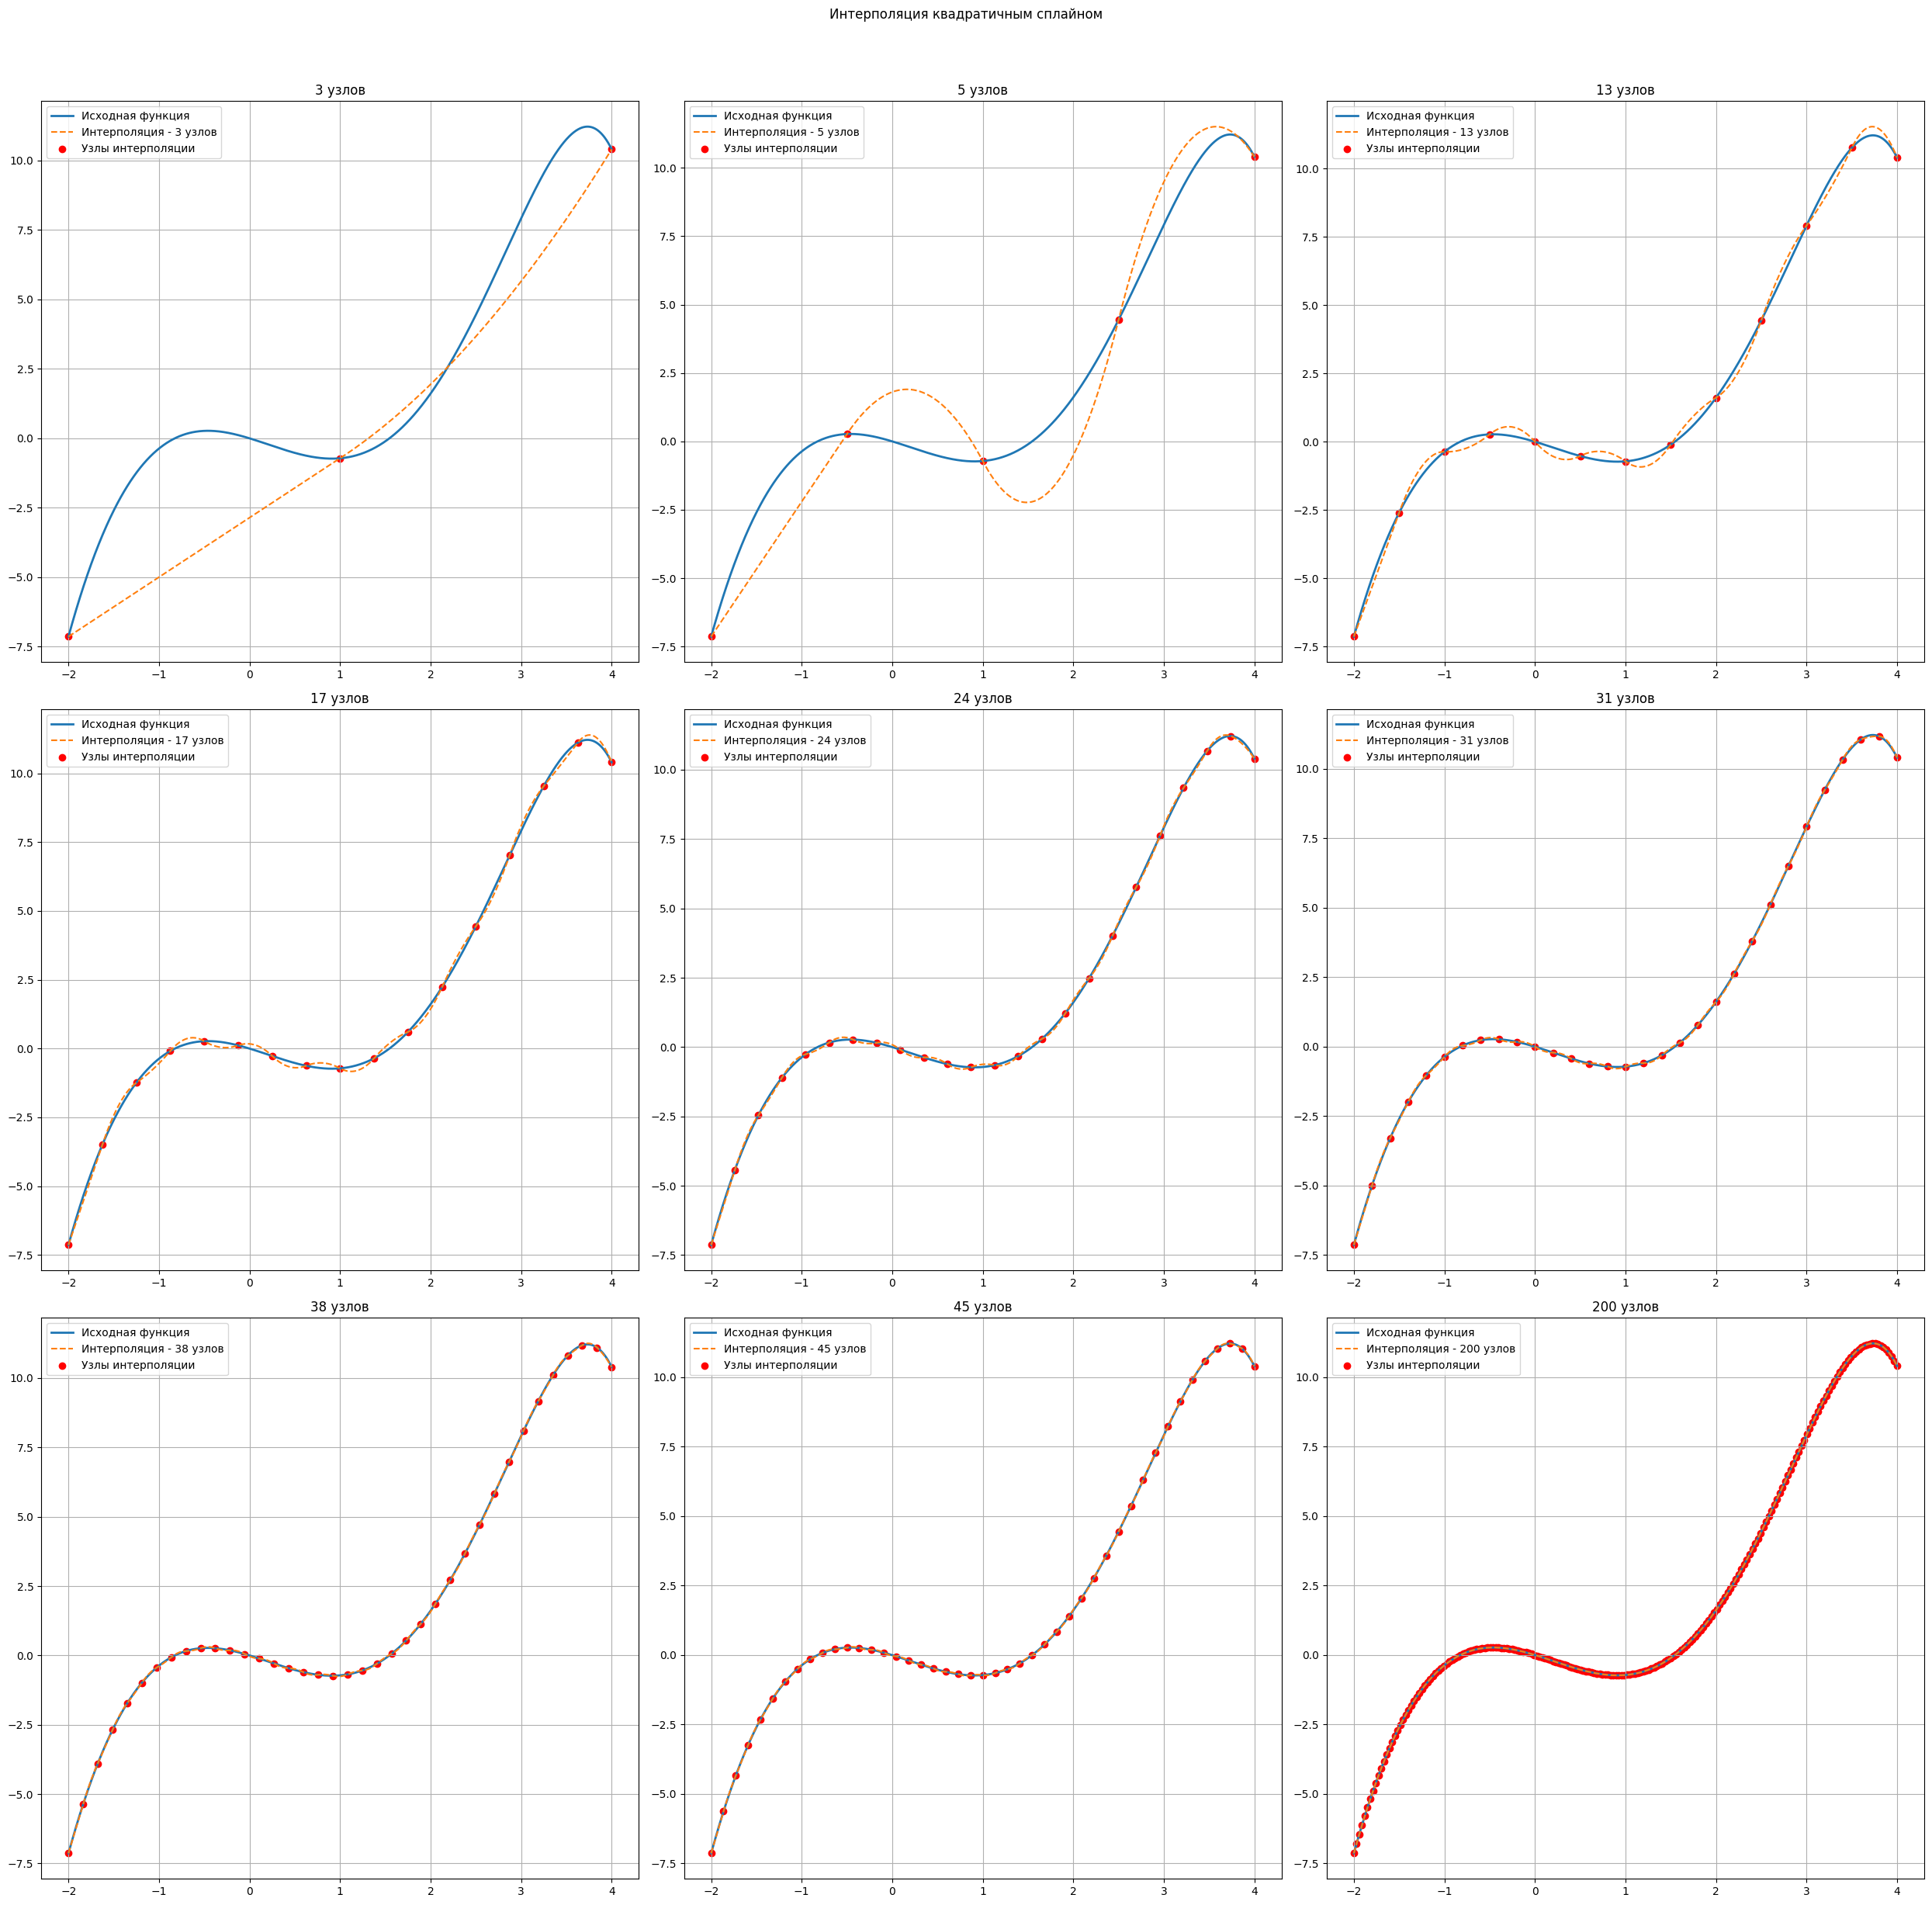

In [1]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from Splines import *

table = PrettyTable()
cols=["Number of nodes","Number of test points","Max deviation RQuadS"]
table.field_names=cols
mas=[]

fig,axes=plt.subplots(3,3,figsize=(25,25))
fig.suptitle("Интерполяция квадратичным сплайном")
a,b=-2,4
tests=[3,5,13,17,24,31,38,45,200]
x_vals = np.linspace(a, b, 1000)
for i, n in enumerate(tests): # Выводит индекс и значение
    Xargs = Nuzl(a, b, tests[i])
    Yargs = [f(x) for x in Xargs]
    Acoefs=quadrSply(a,b,tests[i])
    y_true = [f(x) for x in x_vals]
    y_nuzl = [float(QuadraticSpline(x,Xargs ,Acoefs, tests[i])) for x in x_vals]
    table.add_row([i, len(x_vals), max_deviation(y_true, y_nuzl)])

    row, col = divmod(i, 3)  # Переводим индекс в (строка, столбец)
    ax = axes[row, col]

    # Рисуем графики
    ax.plot(x_vals, y_true, label="Исходная функция", linewidth=2)
    ax.plot(x_vals, y_nuzl, label=f"Интерполяция - {n} узлов", linestyle="--")
    ax.scatter(Xargs, Yargs, color="red", label="Узлы интерполяции")

    ax.legend()
    ax.grid()
    ax.set_title(f"{n} узлов")

print(table)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Корректируем расположение заголовка
plt.show()

+-----------------+-----------------------+-----------------------+
| Number of nodes | Number of test points |  Max deviation RCubS  |
+-----------------+-----------------------+-----------------------+
|        4        |          1000         |   3.2114021972382805  |
|        5        |          1000         |   2.2342713713947457  |
|        13       |          1000         |  0.35628080601783374  |
|        17       |          1000         |  0.20489730064008427  |
|        24       |          1000         |  0.10063919241495078  |
|        31       |          1000         |  0.05951676332310818  |
|        38       |          1000         |  0.039248812104112574 |
|        45       |          1000         |  0.027776836508598635 |
|       200       |          1000         | 0.0013629633115392892 |
+-----------------+-----------------------+-----------------------+


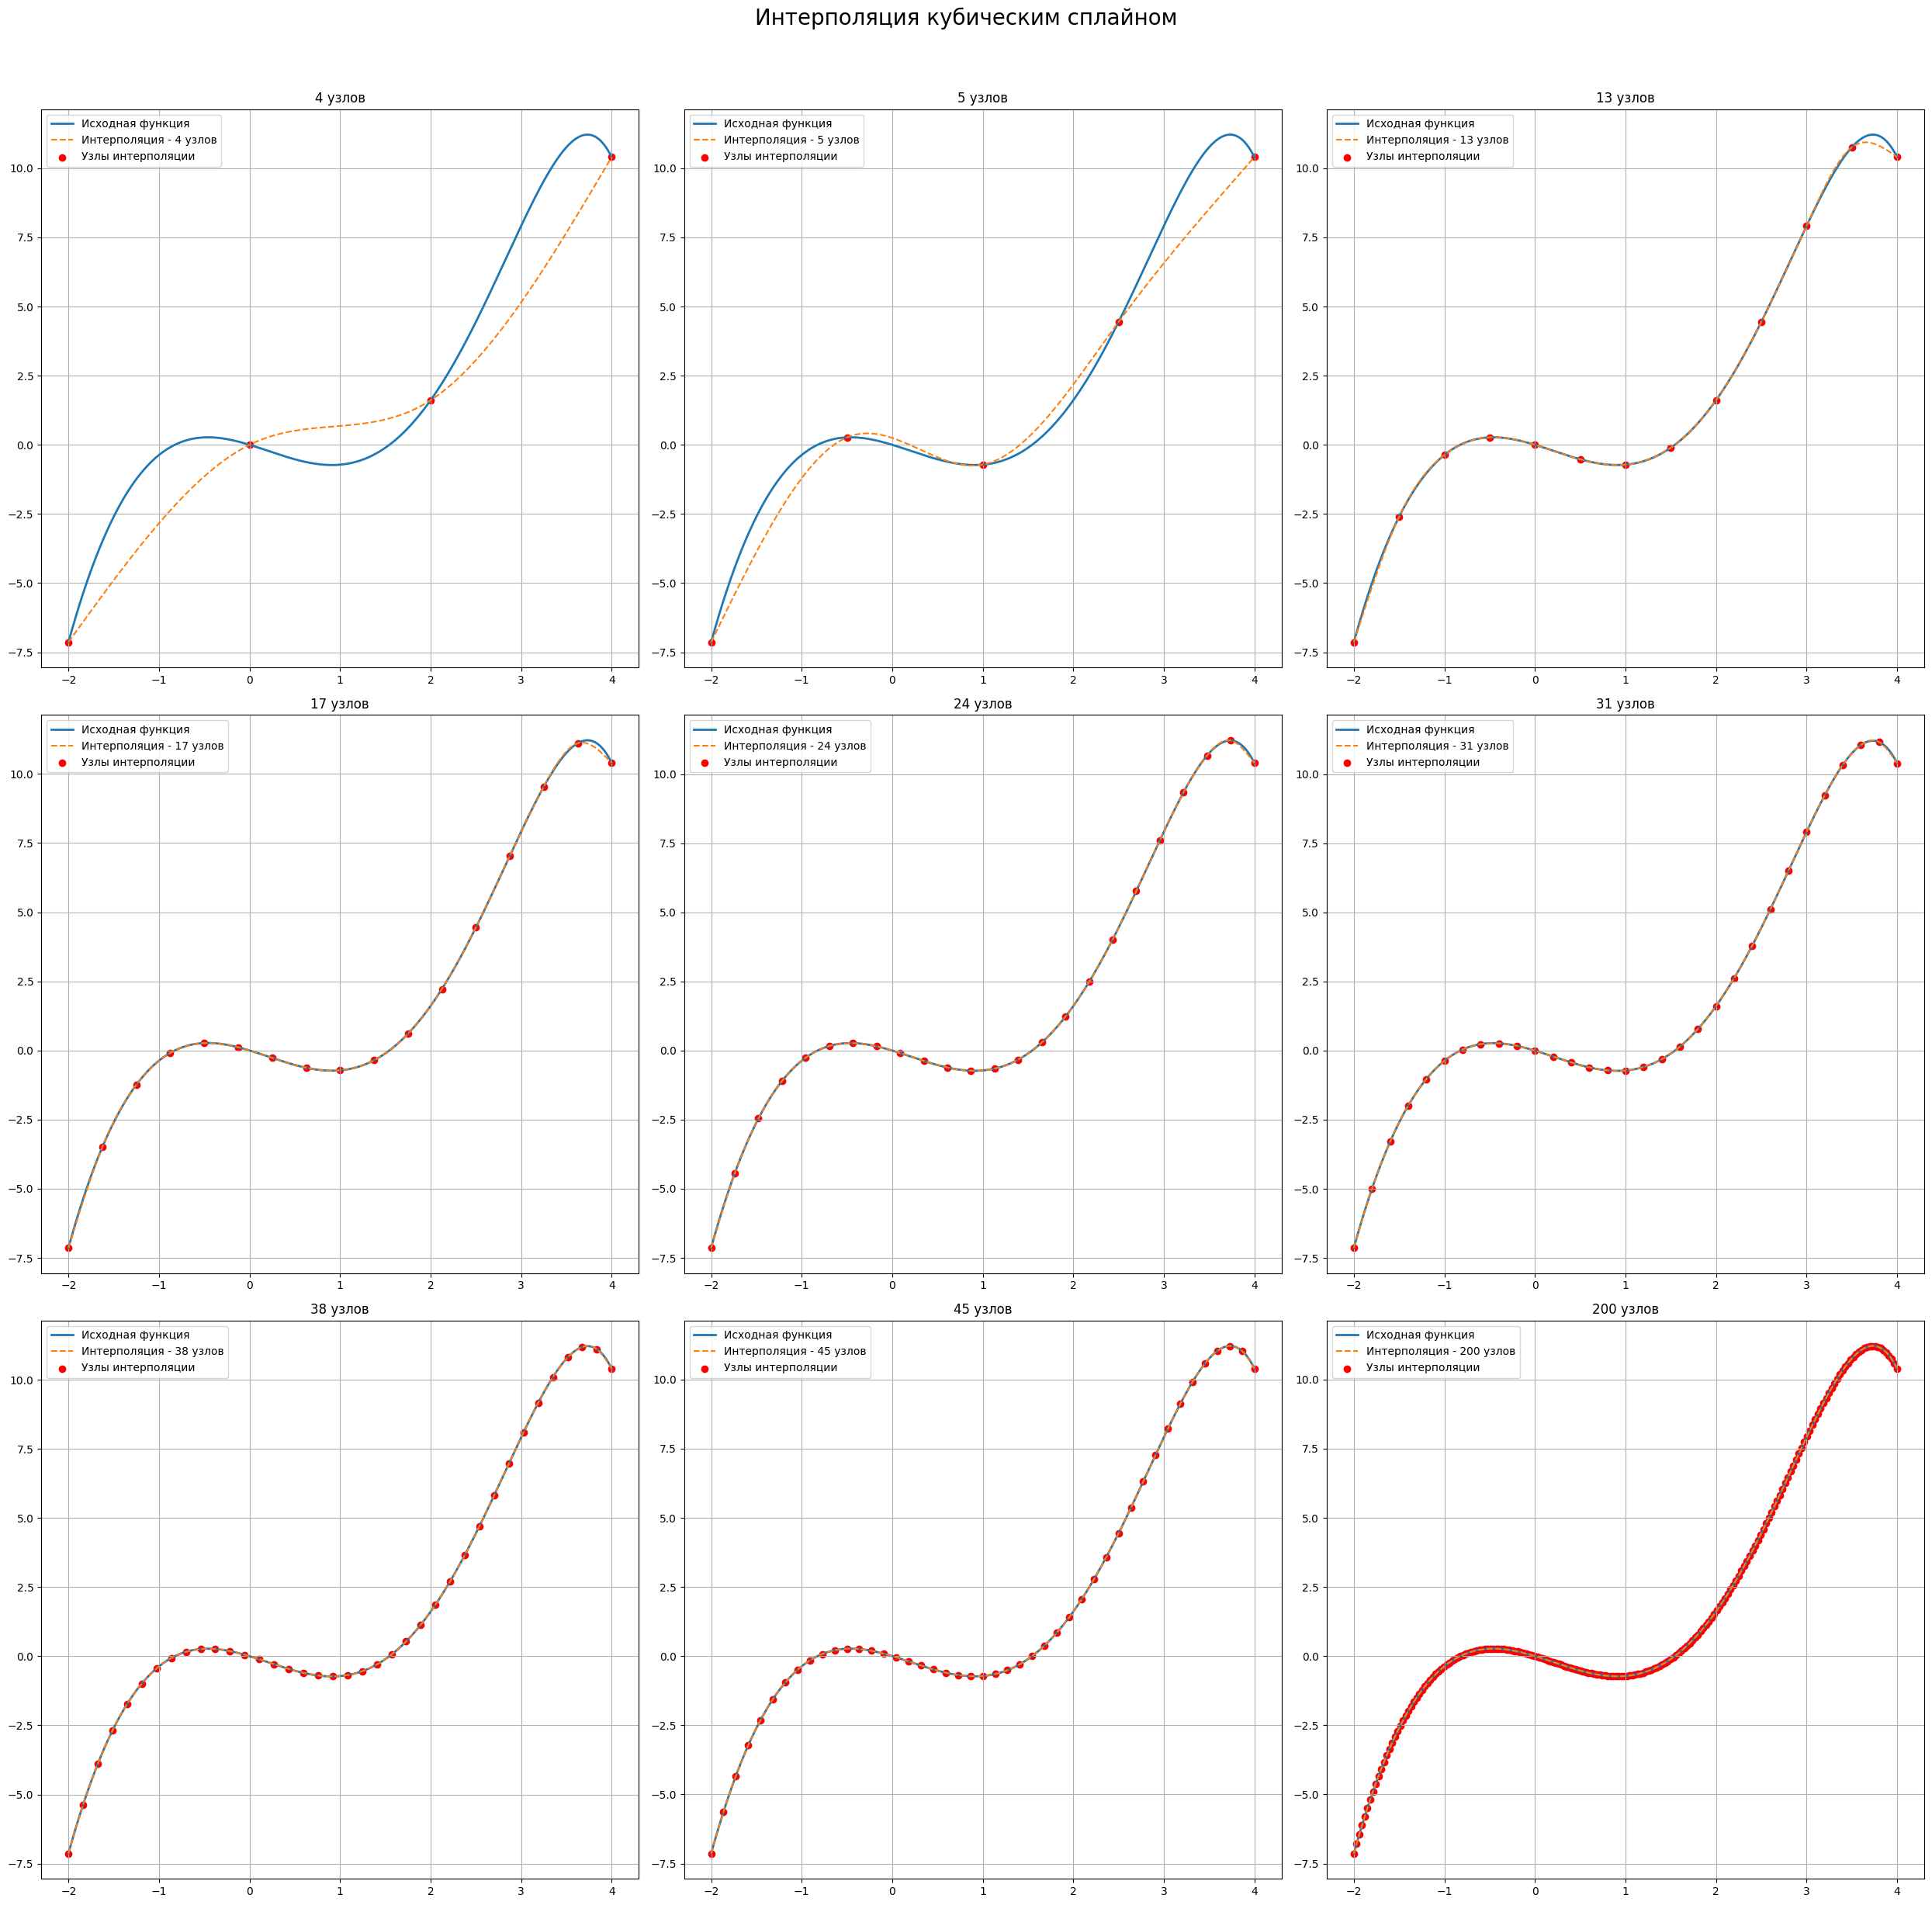

In [2]:
table = PrettyTable()
table.field_names = ["Number of nodes", "Number of test points", "Max deviation RCubS"]

fig, axes = plt.subplots(3, 3, figsize=(25, 25))
fig.suptitle("Интерполяция кубическим сплайном", fontsize=20)

a, b = -2, 4
tests = [4, 5, 13, 17, 24, 31, 38, 45, 200]

x_vals = np.linspace(a, b, 1000)

for i, n in enumerate(tests):
    Xargs = Nuzl(a, b, n)
    Yargs = [f(x) for x in Xargs]
    coefs = cubSply(a, b, n)

    y_true = [f(x) for x in x_vals]
    y_nuzl = [CubicSpline(x, Xargs, coefs, n) for x in x_vals]

    table.add_row([n, len(x_vals), max_deviation(y_true, y_nuzl)])

    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.plot(x_vals, y_true, label="Исходная функция", linewidth=2)
    ax.plot(x_vals, y_nuzl, label=f"Интерполяция - {n} узлов", linestyle="--")
    ax.scatter(Xargs, Yargs, color="red", label="Узлы интерполяции")
    ax.legend()
    ax.grid()
    ax.set_title(f"{n} узлов")

print(table)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Корректируем расположение заголовка

+-----------------+-----------------------+-----------------------+
| Number of nodes | Number of test points |  Max deviation RLinS  |
+-----------------+-----------------------+-----------------------+
|        4        |          1000         |   3.265760516338678   |
|        5        |          1000         |   2.348972397021676   |
|        13       |          1000         |   0.636101412017819   |
|        17       |          1000         |  0.39696586282957647  |
|        24       |          1000         |  0.21100984561208413  |
|        31       |          1000         |  0.13030214118339245  |
|        38       |          1000         |  0.08831570606460204  |
|        45       |          1000         |  0.06376656274489889  |
|       200       |          1000         | 0.0032600854212176955 |
+-----------------+-----------------------+-----------------------+


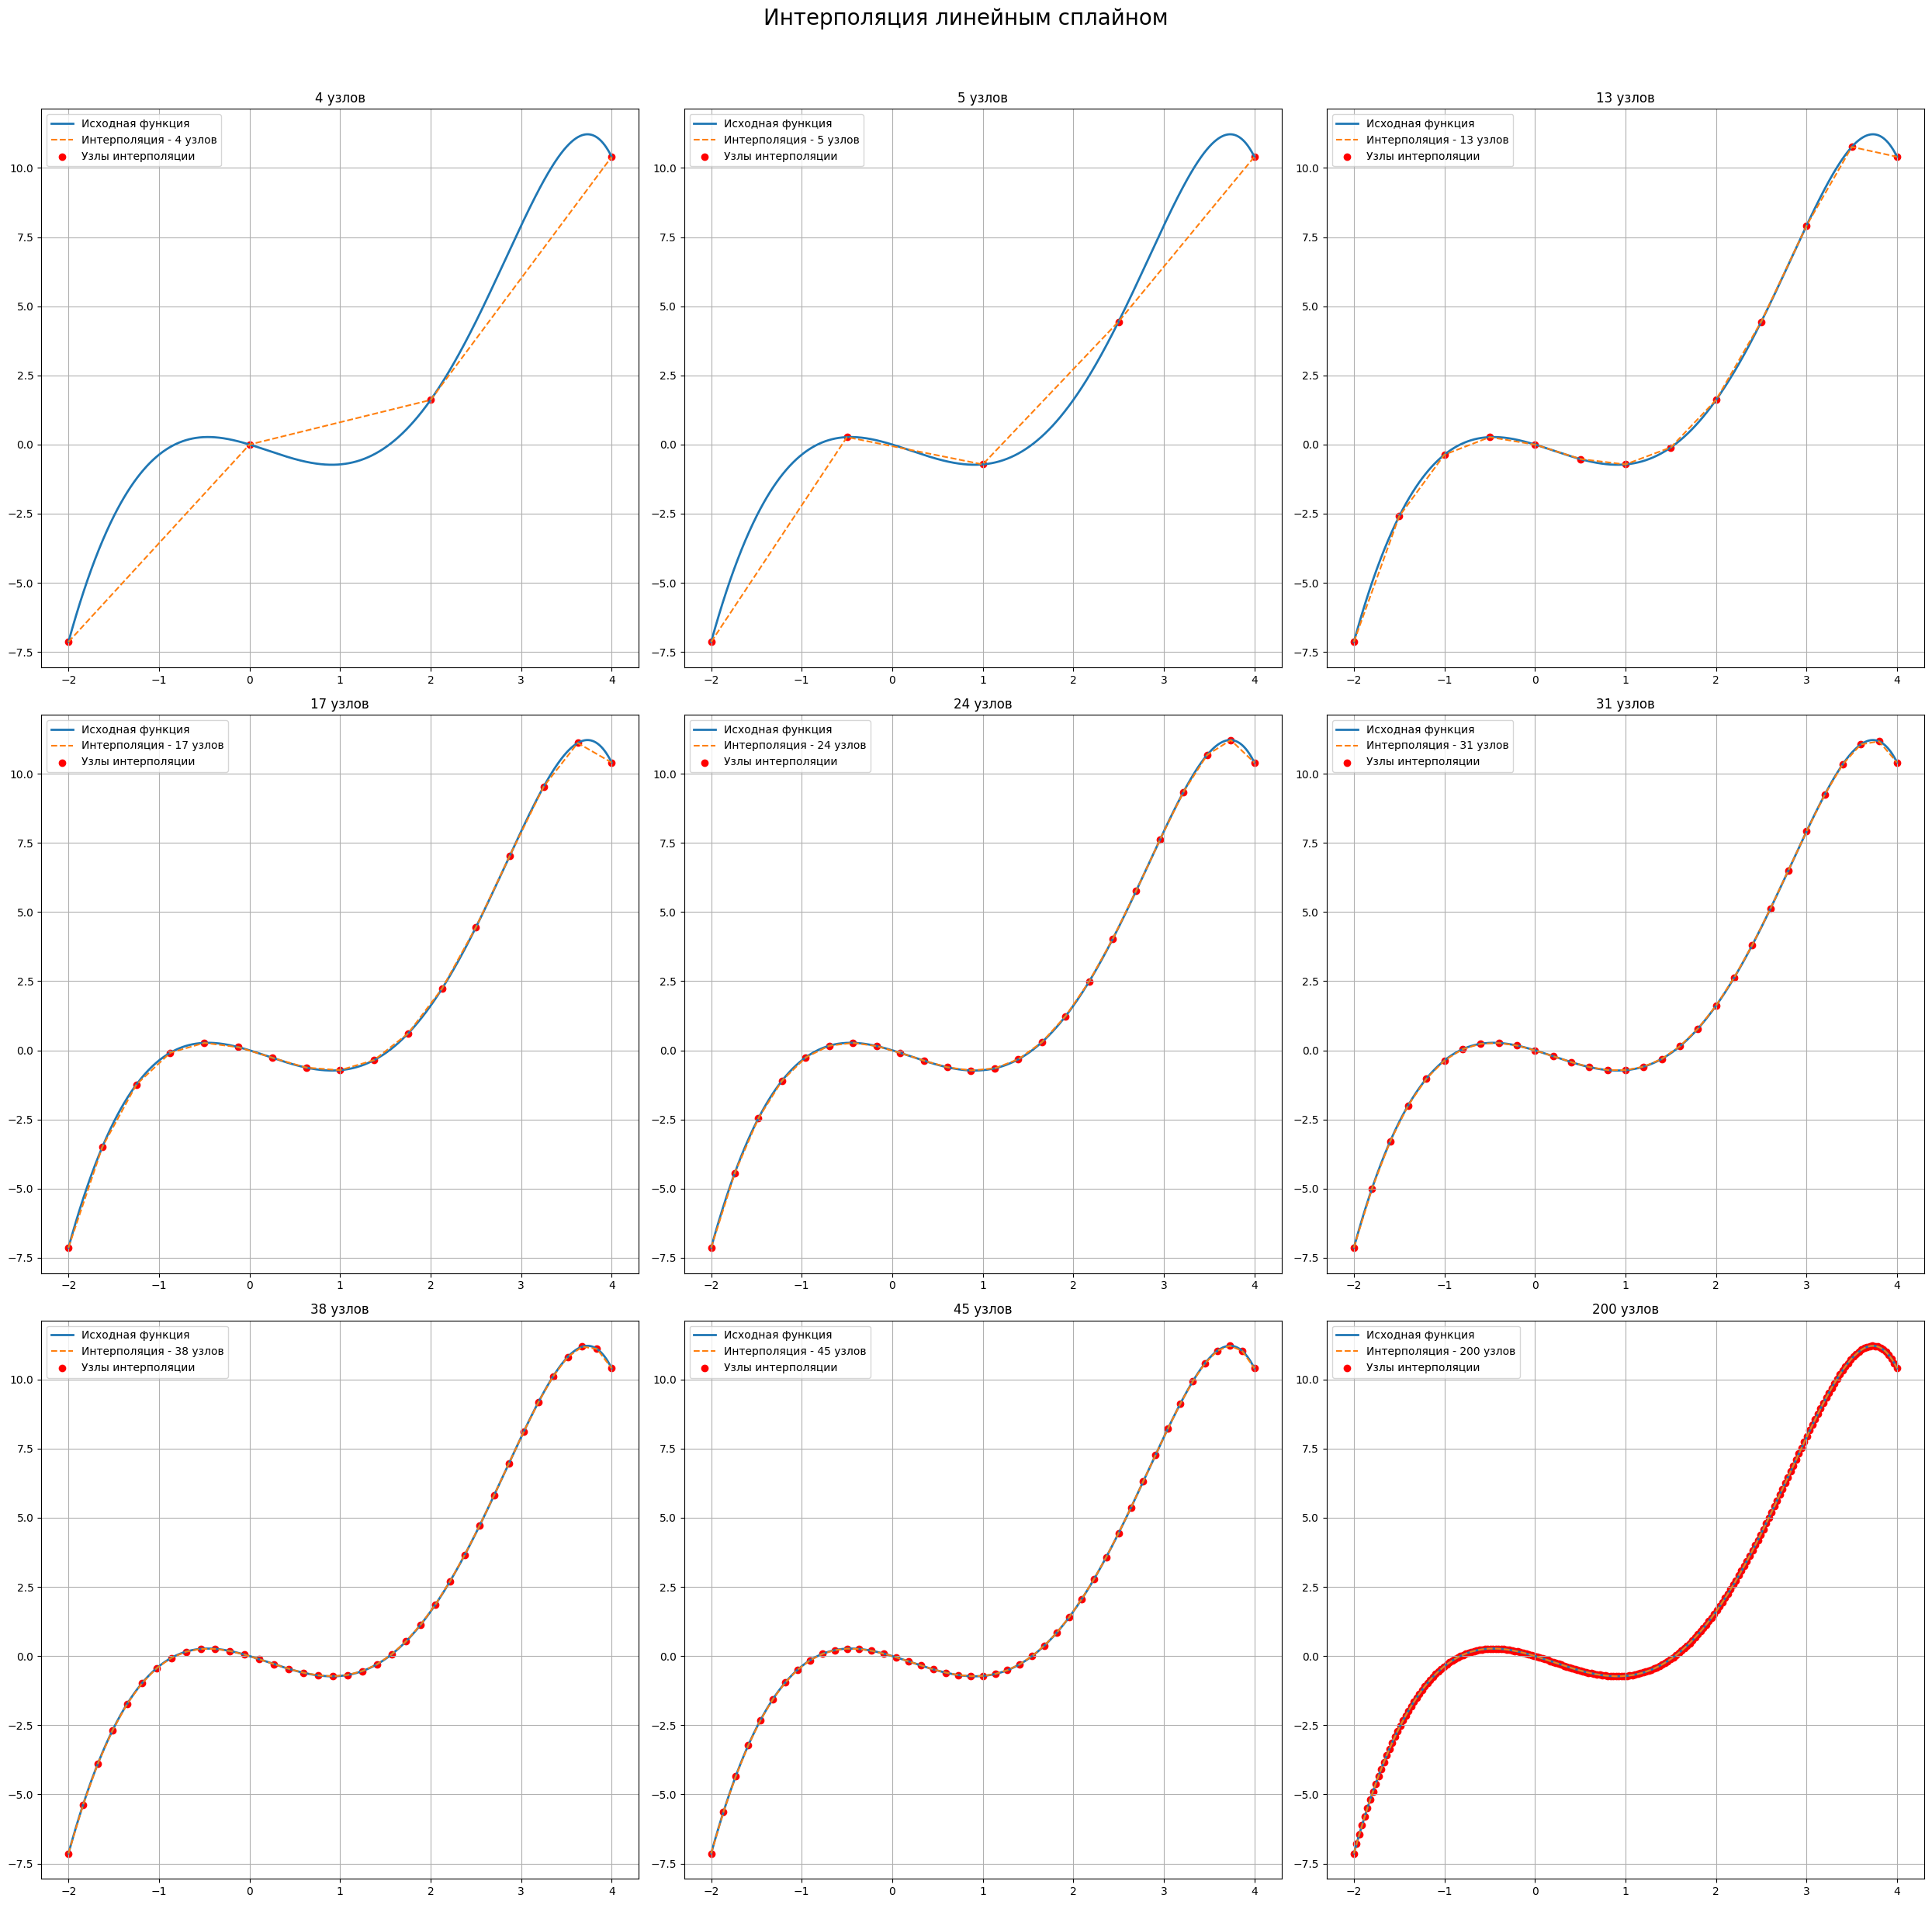

In [3]:
table = PrettyTable()
table.field_names = ["Number of nodes", "Number of test points", "Max deviation RLinS"]

fig, axes = plt.subplots(3, 3, figsize=(25, 25))
fig.suptitle("Интерполяция линейным сплайном", fontsize=20)

a, b = -2, 4
tests = [4, 5, 13, 17, 24, 31, 38, 45, 200]



for i, n in enumerate(tests):
    Xargs = Nuzl(a, b, n)
    Yargs = [f(x) for x in Xargs]
    coefs = linSply(a, b, n)

    y_true = [f(x) for x in x_vals]
    y_nuzl = [LinearSpline(x, coefs, Xargs, n) for x in x_vals]

    table.add_row([n, len(x_vals), max_deviation(y_true, y_nuzl)])

    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.plot(x_vals, y_true, label="Исходная функция", linewidth=2)
    ax.plot(x_vals, y_nuzl, label=f"Интерполяция - {n} узлов", linestyle="--")
    ax.scatter(Xargs, Yargs, color="red", label="Узлы интерполяции")
    ax.legend()
    ax.grid()
    ax.set_title(f"{n} узлов")

print(table)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Корректируем расположение заголовка

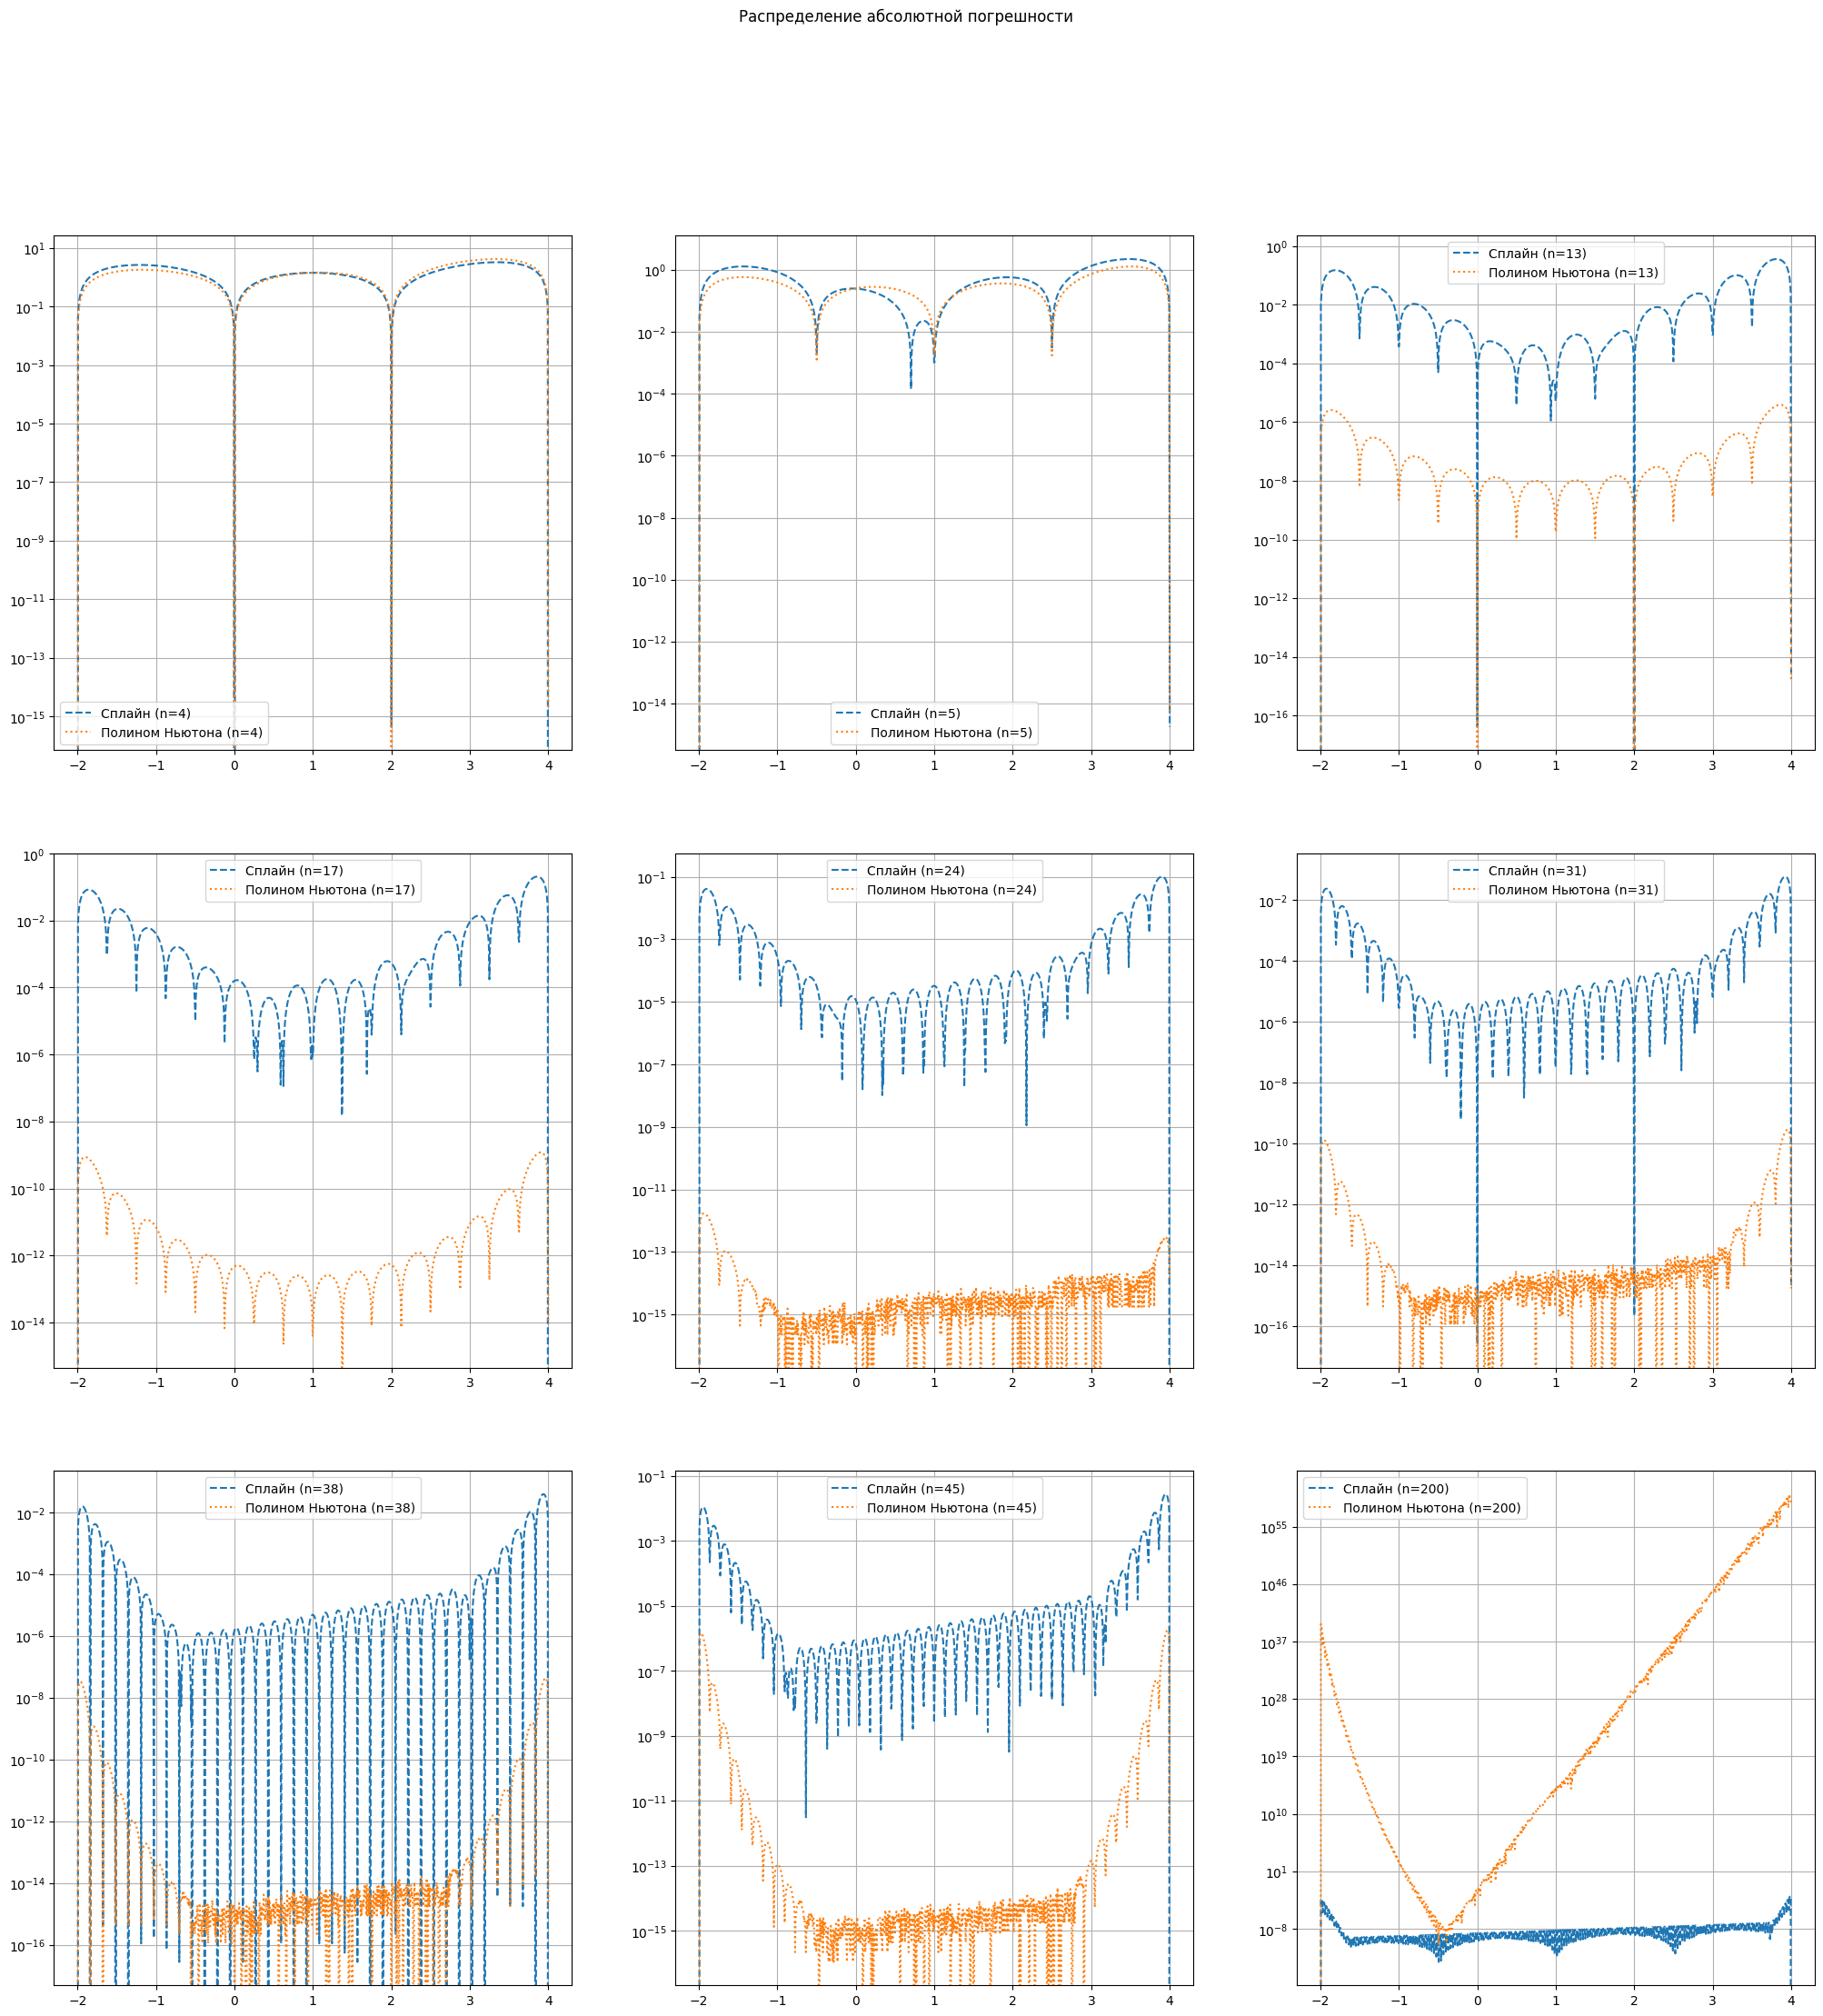

In [5]:
from ПЛН.Newton import *

fig, axes = plt.subplots(3, 3, figsize=(25, 25))
fig.suptitle("Распределение абсолютной погрешности")

a, b = -2, 4
tests = [4, 5, 13, 17, 24, 31, 38, 45, 200]
x_vals = np.linspace(a, b, 1000)
for n in range(len(tests)):
    Xargs = Nuzl(a, b, tests[n])
    Yargs = [f(x) for x in Xargs]

    coefs_spline = cubSply(a, b, tests[n])
    y_true = [f(x) for x in x_vals]

    y_spline = [float(CubicSpline(x, Xargs, coefs_spline, tests[n])) for x in x_vals]
    y_polynom = [Nn(x, a, b, tests[n]) for x in x_vals]  # Полином Ньютона

    abs_error_spline = absolute_error(y_true, y_spline)
    abs_error_polynom = absolute_error(y_true, y_polynom)

    row, col = divmod(n, 3)
    ax = axes[row, col]

    ax.plot(x_vals, abs_error_spline, label=f"Сплайн (n={tests[n]})", linestyle="--")
    ax.plot(x_vals, abs_error_polynom, label=f"Полином Ньютона (n={tests[n]})", linestyle=":")

    ax.set_yscale("log")  # Логарифмическая шкала по y для лучшей видимости ошибок
    ax.legend()
    ax.grid()

plt.show()
